In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
company = pd.read_csv("C:\\My Computer\\Documents\\Excler\\Assignment\\Decision Tree\\Company_Data.csv")
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


C:\Users\yasha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


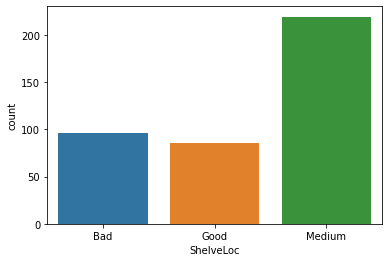

C:\Users\yasha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


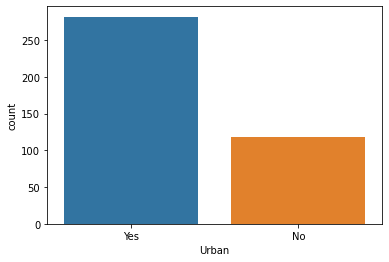

C:\Users\yasha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


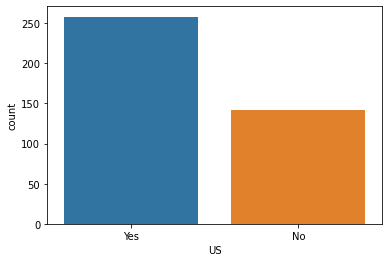

In [4]:
# checking count of categories for categorical columns colums
import seaborn as sns

sns.countplot(company['ShelveLoc'])
plt.show()

sns.countplot(company['Urban'])
plt.show()

sns.countplot(company['US'])
plt.show()

C:\Users\yasha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='count'>

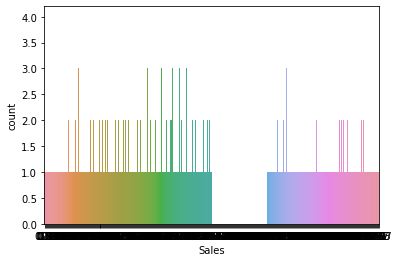

In [5]:
sns.countplot(company['Sales'])

In [6]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
# Coverting Sales column into two categories "low" and "high" at mean
sales_category = []
for value in company["Sales"]:
    if value <= 7.4963:
        sales_category.append("Low")
    else:
        sales_category.append("High")
company["SalesCategory"] = sales_category

In [8]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SalesCategory
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Low
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Low


In [9]:
company.SalesCategory.value_counts()

Low     201
High    199
Name: SalesCategory, dtype: int64

In [10]:
#Encoding the dataset
label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc'] = label_encoder.fit_transform(company['ShelveLoc'])
company['Urban'] = label_encoder.fit_transform(company['Urban'])
company['US'] = label_encoder.fit_transform(company['US'])

In [11]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SalesCategory
0,9.50,138,73,11,276,120,0,42,17,1,1,High
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,High
3,7.40,117,100,4,466,97,2,55,14,1,1,Low
4,4.15,141,64,3,340,128,0,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,High
396,6.14,139,23,3,37,120,2,55,11,0,1,Low
397,7.41,162,26,12,368,159,2,40,18,1,1,Low
398,5.94,100,79,7,284,95,0,50,12,1,1,Low


In [12]:
#Creating input and output variables
x = company.iloc[:, 1:11]
y = company.iloc[:,11]

In [13]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [14]:
y

0      High
1      High
2      High
3       Low
4       Low
       ... 
395    High
396     Low
397     Low
398     Low
399    High
Name: SalesCategory, Length: 400, dtype: object

In [15]:
#Splitting data into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [16]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, class_weight = "balanced") 
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3)

[Text(167.4, 190.26, 'X[4] <= 101.5\nentropy = 1.0\nsamples = 280\nvalue = [140, 140]'),
 Text(83.7, 135.9, 'X[1] <= 38.5\nentropy = 0.523\nsamples = 68\nvalue = [60, 8]'),
 Text(41.85, 81.53999999999999, 'X[5] <= 0.5\nentropy = 0.9\nsamples = 19\nvalue = [13, 6]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.592\nsamples = 14\nvalue = [12, 2]'),
 Text(125.55000000000001, 81.53999999999999, 'X[0] <= 99.5\nentropy = 0.246\nsamples = 49\nvalue = [47, 2]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.863\nsamples = 7\nvalue = [5, 2]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0]'),
 Text(251.10000000000002, 135.9, 'X[5] <= 0.5\nentropy = 0.956\nsamples = 212\nvalue = [80, 132]'),
 Text(209.25, 81.53999999999999, 'X[2] <= 15.5\nentropy = 0.475\nsamples = 49\nvalue = [5, 44]'),
 Text(188.32500000000002, 27.180000000000007, 'entropy = 0.267\nsamples = 44\

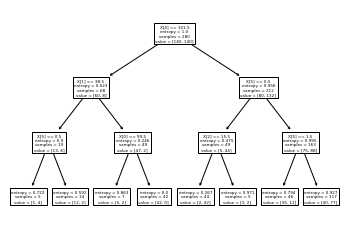

In [17]:
tree.plot_tree(model)

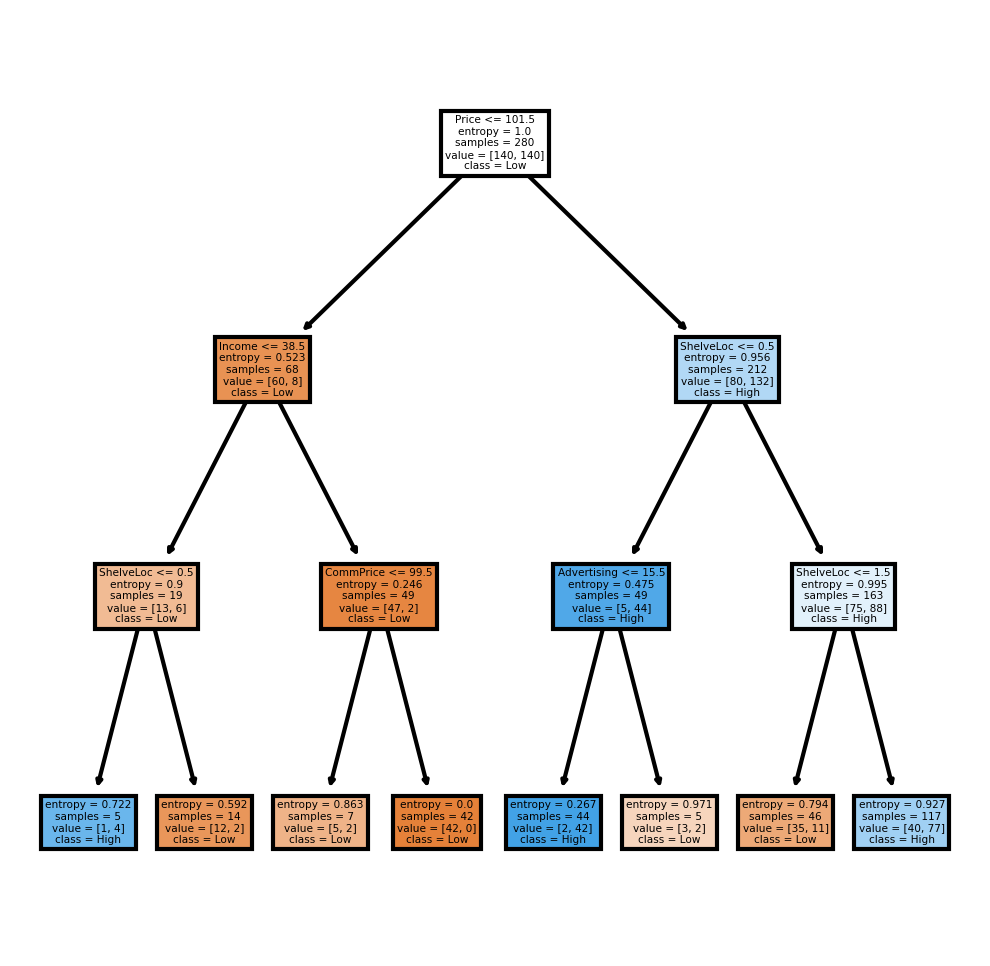

In [18]:
fn=['CommPrice','Income','Advertising','Population', 'Price', 'ShelveLoc', 'Age','Education', 'Urban', 'US'] #feature names
cn=['Low', 'High']  #category names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [19]:
#predicting on test data
pred = model.predict(x_test)
pd.Series(pred).value_counts()

Low     63
High    57
dtype: int64

In [20]:
pred

array(['High', 'Low', 'High', 'Low', 'Low', 'High', 'High', 'High', 'Low',
       'High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'High', 'Low',
       'High', 'High', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'High',
       'Low', 'High', 'Low', 'High', 'Low', 'Low', 'High', 'High', 'Low',
       'Low', 'High', 'Low', 'Low', 'Low', 'High', 'High', 'High', 'High',
       'High', 'High', 'Low', 'Low', 'High', 'Low', 'High', 'High', 'Low',
       'High', 'High', 'High', 'Low', 'High', 'Low', 'Low', 'Low', 'High',
       'Low', 'High', 'Low', 'High', 'High', 'Low', 'Low', 'High', 'Low',
       'High', 'Low', 'Low', 'Low', 'High', 'High', 'Low', 'High', 'Low',
       'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'High', 'High', 'High',
       'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low',
       'Low', 'High', 'Low', 'High', 'High', 'High', 'Low', 'Low', 'High',
       'High', 'High', 'Low', 'Low', 'Low', 'High', 'High', 'Low', 'Low',
       'Low', 'Low', 'High'], dtyp

In [21]:
y_test

10     High
99      Low
314    High
111     Low
331    High
       ... 
197     Low
23      Low
240    High
323    High
383    High
Name: SalesCategory, Length: 120, dtype: object

In [22]:
pd.crosstab(y_test, pred)

col_0,High,Low
SalesCategory,,
High,38,21
Low,19,42


In [23]:
#Accuracy
np.mean(pred==y_test)

0.6666666666666666

In [24]:
model.score(x_test, y_test)

0.6666666666666666

In [25]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier()

In [26]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier()

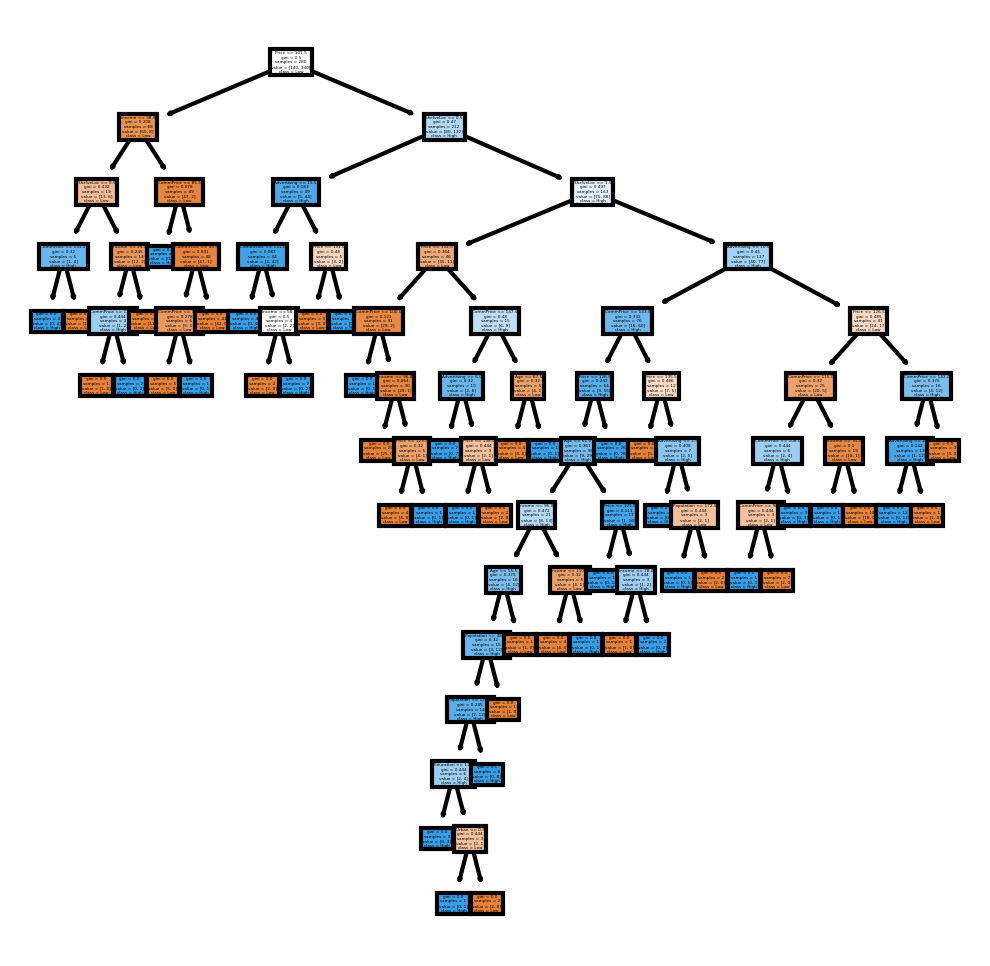

In [27]:
fn=['CommPrice','Income','Advertising','Population', 'Price', 'ShelveLoc', 'Age','Education', 'Urban', 'US'] #feature names
cn=['Low', 'High']  #category names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [28]:
#Prediction and accuracy calculation
preds = model_gini.predict(x_test)
pd.Series(preds).value_counts()

High    65
Low     55
dtype: int64

In [29]:
preds

array(['High', 'Low', 'High', 'Low', 'Low', 'High', 'High', 'High',
       'High', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'High',
       'High', 'Low', 'High', 'High', 'Low', 'Low', 'High', 'High', 'Low',
       'Low', 'High', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'Low',
       'High', 'High', 'Low', 'High', 'Low', 'Low', 'Low', 'High', 'Low',
       'Low', 'High', 'High', 'High', 'High', 'Low', 'High', 'Low',
       'High', 'High', 'Low', 'High', 'High', 'High', 'Low', 'High',
       'Low', 'Low', 'High', 'High', 'High', 'High', 'Low', 'Low', 'Low',
       'Low', 'Low', 'High', 'Low', 'High', 'High', 'Low', 'Low', 'High',
       'High', 'Low', 'High', 'Low', 'Low', 'High', 'High', 'Low', 'Low',
       'High', 'High', 'Low', 'High', 'High', 'Low', 'High', 'Low', 'Low',
       'Low', 'High', 'Low', 'Low', 'Low', 'High', 'Low', 'High', 'High',
       'High', 'Low', 'High', 'High', 'High', 'High', 'Low', 'High',
       'High', 'High', 'High', 'Low', 'Low', 'High', 'High', 'High

In [30]:
pd.crosstab(y_test, preds)

col_0,High,Low
SalesCategory,,
High,39,20
Low,26,35


In [31]:
np.mean(preds==y_test)

0.6166666666666667